In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('train.csv')
data.head()

,shoe size,height,class
0,8.518110,73.029460,seniors
1,10.301527,68.959677,seniors
2,7.386575,73.558042,seniors
3,9.477281,68.195558,seniors
4,10.910389,75.144672,seniors


# EDA

In [3]:
data['class'].value_counts()

fourth     225
seniors    225
Name: class, dtype: int64

Data is well balanced and not skewed towards a particular class.

In [4]:
data.describe()

,shoe size,height
count,450.000000,450.000000
mean,8.568978,63.972348
std,1.830174,6.476236
min,5.111486,51.081101
25%,7.059852,58.014739
50%,8.270641,63.190777
75%,10.162677,69.438135
max,14.305728,79.560421


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   shoe size  450 non-null    float64
 1   height     450 non-null    float64
 2   class      450 non-null    object 
dtypes: float64(2), object(1)
memory usage: 10.7+ KB


There are no missing values and imputation is not required.

Mean of Shoe Size -  8.568977686013334


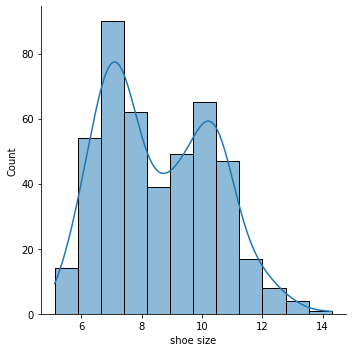

In [6]:
print('Mean of Shoe Size - ', data['shoe size'].mean())
sns.displot(data, x='shoe size', kde=True)
plt.show()

Mean of Height -  63.97234826331111


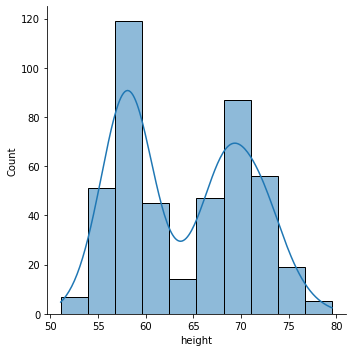

In [7]:
print('Mean of Height - ', data['height'].mean())
sns.displot(data, x='height', kde=True)
plt.show()

Nothing much can be inferred from the distributions.

In [8]:
data.groupby(['class']).agg([np.mean, np.std, np.min,np.max])

shoe size                                    height            \
              mean       std      amin       amax       mean       std   
class                                                                    
fourth    7.057436  0.827191  5.111486  10.430710  58.064356  2.133830   
seniors  10.080519  1.199946  6.815541  14.305728  69.880340  3.065437   

                               
              amin       amax  
class                          
fourth   51.081101  64.227919  
seniors  62.611955  79.560421

Seniors have greater shoe size and height than fourth.

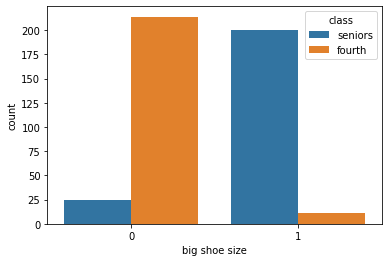

In [9]:
data['big shoe size'] = (data['shoe size'] > data['shoe size'].mean()).astype('int8')
sns.countplot(x='big shoe size', hue='class', data=data)
plt.show()

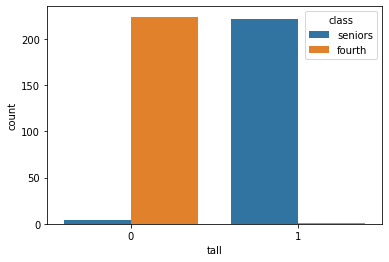

In [10]:
data['tall'] = (data['height'] > data['height'].mean()).astype('int8')
sns.countplot(x='tall', hue='class', data=data)
plt.show()

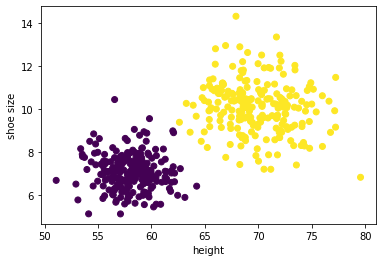

In [11]:
plt.scatter(data['height'], data['shoe size'], c = (data['class'] == 'seniors').astype('int8'))
plt.xlabel('height')
plt.ylabel('shoe size')
plt.show()

# Pre-processing

In [12]:
class_dict = {
    'fourth':  0,
    'seniors': 1
}

In [13]:
inverse_class_dict = {
    0: 'fourth',
    1: 'seniors'
}

In [14]:
data['class'] = (data['class'] == 'seniors').astype('int8')

In [15]:
heightmean, heightstd = data['height'].mean(), data['height'].std()
shoesizemean, shoesizestd = data['shoe size'].mean(), data['shoe size'].std()

In [16]:
def normalize(data) :
    return (data - data.mean(axis=0)) / data.std(axis=0)

In [17]:
X = normalize(np.array(data[['shoe size', 'height']]))
Y = np.array(data['class'])

In [18]:
print(X.shape, Y.shape)

(450, 2) (450,)


In [19]:
from sklearn.model_selection import train_test_split

#### Train - Validation Split

In [20]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.111, random_state=42)

In [21]:
print(X_train.shape, Y_train.shape, X_validation.shape, Y_validation.shape)

(400, 2) (400,) (50, 2) (50,)


# KNN

In [22]:
class KNN :
    def __init__(self, xdata, ydata, k) :
        self.xdata = xdata
        self.ydata = ydata
        self.k = k
        self.m, self.n = xdata.shape
        
    def euclideanDist(self, x1, x2) :
        return np.sqrt(np.sum((x1 - x2) ** 2))
    
    def pointPredict(self, queryPoint) :
        distances = []
        for i in range(self.m) :
            d = self.euclideanDist(queryPoint, self.xdata[i])
            distances.append((d, self.ydata[i]))
        
        distances.sort()
        distances = np.array(distances[:self.k])
        
        dist_freq = np.unique(distances[:,1], return_counts = True) # new_vals = [[val], [freq]]
        max_freq_index = dist_freq[1].argmax()
        pred = dist_freq[0][max_freq_index]
        return pred
    
    def arrayPredict(self, X) :
        result = []
        m, n = X.shape
        for i in range(m) :
            result.append(self.pointPredict(X[i]))
        return np.array(result)


In [23]:
from sklearn.metrics import accuracy_score

In [24]:
validation_acc = [0]
train_acc = [0]

for k in range(1, 21) :
    knn = KNN(X_train, Y_train, k)
    Y_pred_train = knn.arrayPredict(X_train)
    Y_pred_validation = knn.arrayPredict(X_validation)
    validation_acc.append(accuracy_score(Y_pred_validation, Y_validation) * 100)
    train_acc.append(accuracy_score(Y_pred_train, Y_train) * 100)
    
    print('k = {}\t===>\tTrain Accuracy = {}%,  \tValidation Accuracy = {}%'.format(k, train_acc[k], validation_acc[k]))

k = 1	===>	Train Accuracy = 100.0%,  	Validation Accuracy = 100.0%
k = 2	===>	Train Accuracy = 99.75%,  	Validation Accuracy = 100.0%
k = 3	===>	Train Accuracy = 99.75%,  	Validation Accuracy = 100.0%
k = 4	===>	Train Accuracy = 99.5%,  	Validation Accuracy = 100.0%
k = 5	===>	Train Accuracy = 100.0%,  	Validation Accuracy = 100.0%
k = 6	===>	Train Accuracy = 100.0%,  	Validation Accuracy = 100.0%
k = 7	===>	Train Accuracy = 100.0%,  	Validation Accuracy = 100.0%
k = 8	===>	Train Accuracy = 100.0%,  	Validation Accuracy = 100.0%
k = 9	===>	Train Accuracy = 100.0%,  	Validation Accuracy = 100.0%
k = 10	===>	Train Accuracy = 100.0%,  	Validation Accuracy = 100.0%
k = 11	===>	Train Accuracy = 100.0%,  	Validation Accuracy = 100.0%
k = 12	===>	Train Accuracy = 100.0%,  	Validation Accuracy = 100.0%
k = 13	===>	Train Accuracy = 100.0%,  	Validation Accuracy = 100.0%
k = 14	===>	Train Accuracy = 100.0%,  	Validation Accuracy = 100.0%
k = 15	===>	Train Accuracy = 100.0%,  	Validation Accuracy

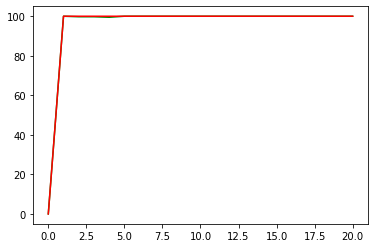

In [25]:
plt.plot(train_acc, color='green', label='Train Accuracy')
plt.plot(validation_acc, color='red', label = 'Validation Accuracy')
plt.show()

# Prediction

#### Taking the value of k to be _**10**_

In [26]:
knn = KNN(X_train, Y_train, 10)

In [27]:
test_data = pd.read_csv('test.csv')
test_data.head()

,shoe size,height,class
0,12.985509,66.632266,seniors
1,9.957683,70.057887,seniors
2,10.366656,67.945519,seniors
3,10.484072,74.846184,seniors
4,10.273374,66.690172,seniors


In [28]:
X_test, Y_test = np.array(test_data[['shoe size', 'height']]), np.array(test_data['class'])

In [29]:
X_test[:, 0] = (X_test[:, 0] - shoesizemean) / shoesizestd
X_test[:, 1] = (X_test[:, 1] - heightmean) / heightstd

In [30]:
Y_pred_test = knn.arrayPredict(X_test)
size = Y_pred_test.shape[0]
Y_test_class = []
for i in range(size) :
    Y_test_class.append(inverse_class_dict[Y_pred_test[i]])
Y_test_class = np.array(Y_test_class)

In [31]:
print('Accuracy for Test Data ===> {}'.format(accuracy_score(Y_test_class, Y_test)))

Accuracy for Test Data ===> 0.9933333333333333
